[View in Colaboratory](https://colab.research.google.com/github/redcican/Master-Thesis/blob/master/15_Hyperparameter_Optimization_Results.ipynb)

## Evaluate the Result of 4 different Methods to tune the Hyperparameters

In [1]:
!wget https://raw.githubusercontent.com/redcican/Master-Thesis/master/car.csv

--2018-06-26 11:10:31--  https://raw.githubusercontent.com/redcican/Master-Thesis/master/car.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25973 (25K) [text/plain]
Saving to: ‘car.csv.1’

car.csv.1           100%[===================>]  25.36K  --.-KB/s    in 0.01s   

2018-06-26 11:10:31 (1.71 MB/s) - ‘car.csv.1’ saved [25973/25973]



In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
df = pd.read_csv('car.csv')
print(df.shape)
type(df)  # pandas.core.frame.DataFrame.
df.head()

(1728, 7)


,Bying,Maint,Doors,Persons,Lug_Boot,Safety,Class_Val
0,4,4,2,2,1,1,1
1,4,4,2,2,1,2,1
2,4,4,2,2,1,3,1
3,4,4,2,2,2,1,1
4,4,4,2,2,2,2,1


In [4]:
X = df.values[:,:-1]
y = pd.get_dummies(df['Class_Val']).values
print(X.shape,y.shape)
input_dim = X.shape[1]

((1728, 6), (1728, 4))


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

((1382, 6), (1382, 4), (346, 6), (346, 4))


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [0]:
def plot_confusion_matrix(model, X, y):
    y_pred = model.predict_classes(X, verbose=0)
    plt.figure(figsize=(8, 6))
    sns.heatmap(pd.DataFrame(confusion_matrix(y, y_pred)), annot=True, fmt='d', cmap='YlGnBu', alpha=0.8, vmin=0)

## 1.Grid Search

In [64]:
model_1 = Sequential()
model_1.add(Dense(256, input_dim=input_dim, activation='relu',kernel_initializer='he_normal'))
model_1.add(Dropout(0.2))
model_1.add(Dense(256, activation='relu',kernel_initializer='he_normal'))
model_1.add(Dropout(0.5))
model_1.add(Dense(4, activation='softmax',kernel_initializer='he_normal'))
model_1.compile(
        loss='categorical_crossentropy',
        optimizer='Nadam',
        metrics=['accuracy'])
model_1_history=model_1.fit(X_train,y_train, batch_size=16,epochs=100,validation_data=(X_test,y_test),verbose=2 )

Train on 1382 samples, validate on 346 samples
Epoch 1/100
 - 1s - loss: 1.0916 - acc: 0.6664 - val_loss: 0.5512 - val_acc: 0.7832
Epoch 2/100
 - 0s - loss: 0.6278 - acc: 0.7337 - val_loss: 0.5446 - val_acc: 0.7399
Epoch 3/100
 - 0s - loss: 0.5116 - acc: 0.7656 - val_loss: 0.4064 - val_acc: 0.8353
Epoch 4/100
 - 0s - loss: 0.4668 - acc: 0.8075 - val_loss: 0.3654 - val_acc: 0.8728
Epoch 5/100
 - 0s - loss: 0.4271 - acc: 0.8075 - val_loss: 0.3083 - val_acc: 0.8757
Epoch 6/100
 - 0s - loss: 0.4015 - acc: 0.8292 - val_loss: 0.2957 - val_acc: 0.8757
Epoch 7/100
 - 0s - loss: 0.3901 - acc: 0.8329 - val_loss: 0.2803 - val_acc: 0.8960
Epoch 8/100
 - 0s - loss: 0.3582 - acc: 0.8423 - val_loss: 0.3172 - val_acc: 0.8555
Epoch 9/100
 - 0s - loss: 0.3275 - acc: 0.8553 - val_loss: 0.3529 - val_acc: 0.8237
Epoch 10/100
 - 0s - loss: 0.3221 - acc: 0.8705 - val_loss: 0.2554 - val_acc: 0.8988
Epoch 11/100
 - 0s - loss: 0.3138 - acc: 0.8611 - val_loss: 0.2394 - val_acc: 0.8873
Epoch 12/100
 - 0s - loss: 

 - 0s - loss: 0.1642 - acc: 0.9262 - val_loss: 0.1566 - val_acc: 0.9277
Epoch 35/100
 - 0s - loss: 0.1766 - acc: 0.9233 - val_loss: 0.2160 - val_acc: 0.9104
Epoch 36/100
 - 0s - loss: 0.1808 - acc: 0.9269 - val_loss: 0.1823 - val_acc: 0.9306
Epoch 37/100
 - 0s - loss: 0.1669 - acc: 0.9284 - val_loss: 0.1523 - val_acc: 0.9422
Epoch 38/100
 - 0s - loss: 0.1609 - acc: 0.9334 - val_loss: 0.1500 - val_acc: 0.9364
Epoch 39/100
 - 0s - loss: 0.1629 - acc: 0.9305 - val_loss: 0.1501 - val_acc: 0.9509
Epoch 40/100
 - 0s - loss: 0.1485 - acc: 0.9356 - val_loss: 0.1656 - val_acc: 0.9451
Epoch 41/100
 - 0s - loss: 0.1419 - acc: 0.9356 - val_loss: 0.1534 - val_acc: 0.9393
Epoch 42/100
 - 0s - loss: 0.1580 - acc: 0.9276 - val_loss: 0.1410 - val_acc: 0.9451
Epoch 43/100
 - 0s - loss: 0.1348 - acc: 0.9450 - val_loss: 0.1605 - val_acc: 0.9422
Epoch 44/100
 - 0s - loss: 0.1448 - acc: 0.9378 - val_loss: 0.1570 - val_acc: 0.9335
Epoch 45/100
 - 0s - loss: 0.1440 - acc: 0.9385 - val_loss: 0.2021 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.1071 - acc: 0.9559 - val_loss: 0.1428 - val_acc: 0.9393
Epoch 69/100
 - 0s - loss: 0.0995 - acc: 0.9580 - val_loss: 0.1312 - val_acc: 0.9538
Epoch 70/100
 - 0s - loss: 0.1053 - acc: 0.9515 - val_loss: 0.1143 - val_acc: 0.9653
Epoch 71/100
 - 0s - loss: 0.1114 - acc: 0.9522 - val_loss: 0.1250 - val_acc: 0.9538
Epoch 72/100
 - 0s - loss: 0.0950 - acc: 0.9616 - val_loss: 0.1296 - val_acc: 0.9538
Epoch 73/100
 - 0s - loss: 0.1045 - acc: 0.9631 - val_loss: 0.1090 - val_acc: 0.9538
Epoch 74/100
 - 0s - loss: 0.1004 - acc: 0.9551 - val_loss: 0.1259 - val_acc: 0.9480
Epoch 75/100
 - 0s - loss: 0.0858 - acc: 0.9711 - val_loss: 0.1354 - val_acc: 0.9509
Epoch 76/100
 - 0s - loss: 0.1055 - acc: 0.9588 - val_loss: 0.1150 - val_acc: 0.9624
Epoch 77/100
 - 0s - loss: 0.0933 - acc: 0.9595 - val_loss: 0.1256 - val_acc: 0.9422
Epoch 78/100
 - 0s - loss: 0.0952 - acc: 0.9624 - val_loss: 0.1137 - val_acc: 0.9624
Epoch 79/100
 - 0s - loss: 0.0913 - acc: 0.9595 - val_loss: 0.111

In [65]:
model_1_train_score = model_1.evaluate(X_train,y_train,verbose=0)
model_1_score = model_1.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_1_train_score[0])
print("Test loss: ",model_1_score[0])
print("Train accuracy: %.4f%%"% (model_1_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_1_score[1]*100))

('Train loss: ', 0.030188280978064353)
('Test loss: ', 0.08891730044424706)
Train accuracy: 98.9870%
Test accuracy: 97.1098%


             precision    recall  f1-score   support

          0       0.98      0.99      0.99       240
          1       0.96      0.92      0.94        79
          2       0.89      1.00      0.94        17
          3       1.00      0.80      0.89        10

avg / total       0.97      0.97      0.97       346



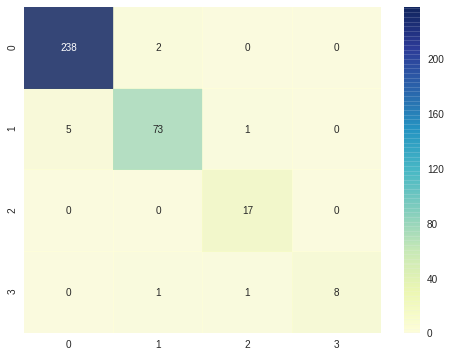

In [67]:
y_pred_class = model_1.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))
plot_confusion_matrix(model_1, X_test, y_test_class)

## 2. Random Search

In [43]:
model_2 = Sequential()
model_2.add(Dense(64, input_dim=input_dim, activation='tanh',kernel_initializer='he_uniform'))
model_2.add(Dropout(0.0))
model_2.add(Dense(8, activation='tanh',kernel_initializer='he_uniform'))
model_2.add(Dropout(0.0))
model_2.add(Dense(4, activation='softmax',kernel_initializer='he_uniform'))
model_2.compile(
        loss='categorical_crossentropy',
        optimizer='Adadelta',
        metrics=['accuracy'])
model_2_history=model_2.fit(X_train,y_train, batch_size=128,epochs=100,validation_data=(X_test,y_test),verbose=2 )

Train on 1382 samples, validate on 346 samples
Epoch 1/100
 - 1s - loss: 0.9981 - acc: 0.6946 - val_loss: 0.9480 - val_acc: 0.6936
Epoch 2/100
 - 0s - loss: 0.9106 - acc: 0.7019 - val_loss: 0.8896 - val_acc: 0.6936
Epoch 3/100
 - 0s - loss: 0.8641 - acc: 0.7019 - val_loss: 0.8531 - val_acc: 0.6936
Epoch 4/100
 - 0s - loss: 0.8338 - acc: 0.7019 - val_loss: 0.8266 - val_acc: 0.6936
Epoch 5/100
 - 0s - loss: 0.8085 - acc: 0.7019 - val_loss: 0.7992 - val_acc: 0.6936
Epoch 6/100
 - 0s - loss: 0.7831 - acc: 0.7019 - val_loss: 0.7717 - val_acc: 0.6936
Epoch 7/100
 - 0s - loss: 0.7581 - acc: 0.7026 - val_loss: 0.7431 - val_acc: 0.6965
Epoch 8/100
 - 0s - loss: 0.7316 - acc: 0.7077 - val_loss: 0.7190 - val_acc: 0.6965
Epoch 9/100
 - 0s - loss: 0.7052 - acc: 0.7135 - val_loss: 0.6917 - val_acc: 0.7139
Epoch 10/100
 - 0s - loss: 0.6839 - acc: 0.7207 - val_loss: 0.6693 - val_acc: 0.7399
Epoch 11/100
 - 0s - loss: 0.6625 - acc: 0.7308 - val_loss: 0.6510 - val_acc: 0.7659
Epoch 12/100
 - 0s - loss: 

 - 0s - loss: 0.3465 - acc: 0.8647 - val_loss: 0.3448 - val_acc: 0.8584
Epoch 37/100
 - 0s - loss: 0.3308 - acc: 0.8705 - val_loss: 0.3419 - val_acc: 0.8671
Epoch 38/100
 - 0s - loss: 0.3247 - acc: 0.8792 - val_loss: 0.3236 - val_acc: 0.8786
Epoch 39/100
 - 0s - loss: 0.3148 - acc: 0.8777 - val_loss: 0.3368 - val_acc: 0.8584
Epoch 40/100
 - 0s - loss: 0.3060 - acc: 0.8828 - val_loss: 0.3061 - val_acc: 0.8931
Epoch 41/100
 - 0s - loss: 0.3053 - acc: 0.8857 - val_loss: 0.3021 - val_acc: 0.8931
Epoch 42/100
 - 0s - loss: 0.2995 - acc: 0.8842 - val_loss: 0.3000 - val_acc: 0.8873
Epoch 43/100
 - 0s - loss: 0.3021 - acc: 0.8806 - val_loss: 0.3103 - val_acc: 0.8931
Epoch 44/100
 - 0s - loss: 0.2952 - acc: 0.8864 - val_loss: 0.2917 - val_acc: 0.9017
Epoch 45/100
 - 0s - loss: 0.2829 - acc: 0.8951 - val_loss: 0.3046 - val_acc: 0.8931
Epoch 46/100
 - 0s - loss: 0.2824 - acc: 0.8958 - val_loss: 0.2889 - val_acc: 0.8960
Epoch 47/100
 - 0s - loss: 0.2797 - acc: 0.8987 - val_loss: 0.2808 - val_acc: 

Epoch 70/100
 - 0s - loss: 0.2105 - acc: 0.9226 - val_loss: 0.2274 - val_acc: 0.9191
Epoch 71/100
 - 0s - loss: 0.2154 - acc: 0.9204 - val_loss: 0.2259 - val_acc: 0.9162
Epoch 72/100
 - 0s - loss: 0.2060 - acc: 0.9204 - val_loss: 0.2269 - val_acc: 0.9133
Epoch 73/100
 - 0s - loss: 0.2045 - acc: 0.9305 - val_loss: 0.2289 - val_acc: 0.9104
Epoch 74/100
 - 0s - loss: 0.2088 - acc: 0.9226 - val_loss: 0.2239 - val_acc: 0.9162
Epoch 75/100
 - 0s - loss: 0.2041 - acc: 0.9219 - val_loss: 0.2335 - val_acc: 0.9017
Epoch 76/100
 - 0s - loss: 0.2018 - acc: 0.9226 - val_loss: 0.2182 - val_acc: 0.9191
Epoch 77/100
 - 0s - loss: 0.2077 - acc: 0.9211 - val_loss: 0.2241 - val_acc: 0.9162
Epoch 78/100
 - 0s - loss: 0.2049 - acc: 0.9240 - val_loss: 0.2209 - val_acc: 0.9162
Epoch 79/100
 - 0s - loss: 0.2024 - acc: 0.9204 - val_loss: 0.2288 - val_acc: 0.9162
Epoch 80/100
 - 0s - loss: 0.1947 - acc: 0.9291 - val_loss: 0.2174 - val_acc: 0.9162
Epoch 81/100
 - 0s - loss: 0.1940 - acc: 0.9298 - val_loss: 0.233

In [44]:
model_2_train_score = model_2.evaluate(X_train,y_train,verbose=0)
model_2_score = model_2.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_2_train_score[0])
print("Test loss: ",model_2_score[0])
print("Train accuracy: %.4f%%"% (model_2_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_2_score[1]*100))

('Train loss: ', 0.18144990611880715)
('Test loss: ', 0.21116091956982033)
Train accuracy: 92.4023%
Test accuracy: 91.6185%


             precision    recall  f1-score   support

          0       0.98      0.97      0.97       240
          1       0.89      0.90      0.89        79
          2       0.76      0.76      0.76        17
          3       0.82      0.90      0.86        10

avg / total       0.94      0.94      0.94       346



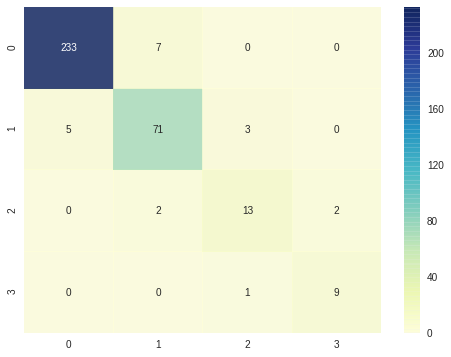

In [53]:
y_pred_class = model_2.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))
plot_confusion_matrix(model_2, X_test, y_test_class)

## 3. Gaussian Process

In [48]:
model_3 = Sequential()
model_3.add(Dense(256, input_dim=input_dim, activation='tanh',kernel_initializer='glorot_uniform'))
model_3.add(Dropout(0.0))
model_3.add(Dense(256, activation='tanh',kernel_initializer='glorot_uniform'))
model_3.add(Dropout(0.0))
model_3.add(Dense(4, activation='softmax',kernel_initializer='glorot_uniform'))
model_3.compile(
        loss='categorical_crossentropy',
        optimizer='Nadam',
        metrics=['accuracy'])
model_3_history=model_3.fit(X_train,y_train, batch_size=16,epochs=100,validation_data=(X_test,y_test),verbose=2 )

Train on 1382 samples, validate on 346 samples
Epoch 1/100
 - 1s - loss: 0.6958 - acc: 0.7004 - val_loss: 0.7296 - val_acc: 0.7023
Epoch 2/100
 - 0s - loss: 0.5303 - acc: 0.7771 - val_loss: 1.1988 - val_acc: 0.5173
Epoch 3/100
 - 0s - loss: 0.4546 - acc: 0.8068 - val_loss: 0.3706 - val_acc: 0.8237
Epoch 4/100
 - 0s - loss: 0.3649 - acc: 0.8357 - val_loss: 0.2820 - val_acc: 0.8931
Epoch 5/100
 - 0s - loss: 0.3091 - acc: 0.8842 - val_loss: 0.2624 - val_acc: 0.8931
Epoch 6/100
 - 0s - loss: 0.2793 - acc: 0.8864 - val_loss: 0.2462 - val_acc: 0.9017
Epoch 7/100
 - 0s - loss: 0.2636 - acc: 0.8900 - val_loss: 0.3697 - val_acc: 0.8584
Epoch 8/100
 - 0s - loss: 0.2464 - acc: 0.9030 - val_loss: 0.3241 - val_acc: 0.8728
Epoch 9/100
 - 0s - loss: 0.2319 - acc: 0.9074 - val_loss: 0.2060 - val_acc: 0.9220
Epoch 10/100
 - 0s - loss: 0.2101 - acc: 0.9204 - val_loss: 0.3590 - val_acc: 0.8266
Epoch 11/100
 - 0s - loss: 0.1997 - acc: 0.9247 - val_loss: 0.1775 - val_acc: 0.9306
Epoch 12/100
 - 0s - loss: 

 - 0s - loss: 0.0362 - acc: 0.9884 - val_loss: 0.0708 - val_acc: 0.9711
Epoch 35/100
 - 0s - loss: 0.0306 - acc: 0.9928 - val_loss: 0.0580 - val_acc: 0.9884
Epoch 36/100
 - 0s - loss: 0.0313 - acc: 0.9920 - val_loss: 0.1094 - val_acc: 0.9653
Epoch 37/100
 - 0s - loss: 0.0324 - acc: 0.9906 - val_loss: 0.1477 - val_acc: 0.9335
Epoch 38/100
 - 0s - loss: 0.0318 - acc: 0.9920 - val_loss: 0.0738 - val_acc: 0.9711
Epoch 39/100
 - 0s - loss: 0.0213 - acc: 0.9964 - val_loss: 0.0580 - val_acc: 0.9855
Epoch 40/100
 - 0s - loss: 0.0345 - acc: 0.9877 - val_loss: 0.0804 - val_acc: 0.9769
Epoch 41/100
 - 0s - loss: 0.0256 - acc: 0.9971 - val_loss: 0.0510 - val_acc: 0.9798
Epoch 42/100
 - 0s - loss: 0.0320 - acc: 0.9928 - val_loss: 0.0573 - val_acc: 0.9798
Epoch 43/100
 - 0s - loss: 0.0259 - acc: 0.9935 - val_loss: 0.0539 - val_acc: 0.9884
Epoch 44/100
 - 0s - loss: 0.0193 - acc: 0.9957 - val_loss: 0.0879 - val_acc: 0.9624
Epoch 45/100
 - 0s - loss: 0.0251 - acc: 0.9920 - val_loss: 0.0614 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0031 - acc: 1.0000 - val_loss: 0.0202 - val_acc: 0.9942
Epoch 69/100
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0199 - val_acc: 0.9942
Epoch 70/100
 - 0s - loss: 0.0029 - acc: 1.0000 - val_loss: 0.0228 - val_acc: 0.9942
Epoch 71/100
 - 0s - loss: 0.0027 - acc: 1.0000 - val_loss: 0.0241 - val_acc: 0.9942
Epoch 72/100
 - 0s - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0196 - val_acc: 0.9971
Epoch 73/100
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0161 - val_acc: 0.9942
Epoch 74/100
 - 0s - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0167 - val_acc: 0.9971
Epoch 75/100
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0177 - val_acc: 0.9971
Epoch 76/100
 - 0s - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0169 - val_acc: 0.9942
Epoch 77/100
 - 0s - loss: 0.0018 - acc: 1.0000 - val_loss: 0.0195 - val_acc: 0.9971
Epoch 78/100
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.0139 - val_acc: 0.9942
Epoch 79/100
 - 0s - loss: 0.0017 - acc: 1.0000 - val_loss: 0.012

In [49]:
model_3_train_score = model_3.evaluate(X_train,y_train,verbose=0)
model_3_score = model_3.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_3_train_score[0])
print("Test loss: ",model_3_score[0])
print("Train accuracy: %.4f%%"% (model_3_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_3_score[1]*100))

('Train loss: ', 0.0025419136002614645)
('Test loss: ', 0.021032969774193847)
Train accuracy: 100.0000%
Test accuracy: 99.4220%


             precision    recall  f1-score   support

          0       1.00      1.00      1.00       240
          1       0.99      0.99      0.99        79
          2       0.94      1.00      0.97        17
          3       1.00      1.00      1.00        10

avg / total       0.99      0.99      0.99       346



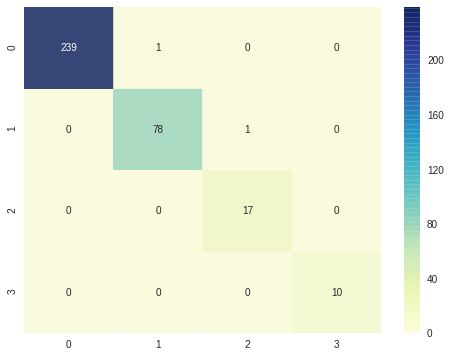

In [52]:
y_pred_class = model_3.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))
plot_confusion_matrix(model_3, X_test, y_test_class)

## 4. TPE Search

In [55]:
model_4 = Sequential()
model_4.add(Dense(64, input_dim=input_dim, activation='relu',kernel_initializer='he_normal'))
model_4.add(Dropout(0.0))
model_4.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model_4.add(Dropout(0.1))
model_4.add(Dense(4, activation='softmax',kernel_initializer='lecun_uniform'))
model_4.compile(
        loss='categorical_crossentropy',
        optimizer='Nadam',
        metrics=['accuracy'])
model_4_history=model_4.fit(X_train,y_train, batch_size=16,epochs=100,validation_data=(X_test,y_test),verbose=2 )

Train on 1382 samples, validate on 346 samples
Epoch 1/100
 - 1s - loss: 0.8224 - acc: 0.6881 - val_loss: 0.5271 - val_acc: 0.7746
Epoch 2/100
 - 0s - loss: 0.5083 - acc: 0.7887 - val_loss: 0.4130 - val_acc: 0.8382
Epoch 3/100
 - 0s - loss: 0.4229 - acc: 0.8205 - val_loss: 0.3691 - val_acc: 0.8295
Epoch 4/100
 - 0s - loss: 0.3624 - acc: 0.8553 - val_loss: 0.3106 - val_acc: 0.8728
Epoch 5/100
 - 0s - loss: 0.3098 - acc: 0.8712 - val_loss: 0.2989 - val_acc: 0.8844
Epoch 6/100
 - 0s - loss: 0.2938 - acc: 0.8849 - val_loss: 0.2878 - val_acc: 0.8844
Epoch 7/100
 - 0s - loss: 0.2825 - acc: 0.8755 - val_loss: 0.2512 - val_acc: 0.8931
Epoch 8/100
 - 0s - loss: 0.2610 - acc: 0.8915 - val_loss: 0.4853 - val_acc: 0.7717
Epoch 9/100
 - 0s - loss: 0.2539 - acc: 0.8973 - val_loss: 0.2243 - val_acc: 0.9046
Epoch 10/100
 - 0s - loss: 0.2467 - acc: 0.9009 - val_loss: 0.2247 - val_acc: 0.9133
Epoch 11/100
 - 0s - loss: 0.2266 - acc: 0.9110 - val_loss: 0.2545 - val_acc: 0.8902
Epoch 12/100
 - 0s - loss: 

 - 0s - loss: 0.1369 - acc: 0.9450 - val_loss: 0.1916 - val_acc: 0.9075
Epoch 35/100
 - 0s - loss: 0.1333 - acc: 0.9443 - val_loss: 0.1481 - val_acc: 0.9364
Epoch 36/100
 - 0s - loss: 0.1284 - acc: 0.9493 - val_loss: 0.1574 - val_acc: 0.9335
Epoch 37/100
 - 0s - loss: 0.1190 - acc: 0.9544 - val_loss: 0.1469 - val_acc: 0.9480
Epoch 38/100
 - 0s - loss: 0.1142 - acc: 0.9595 - val_loss: 0.1970 - val_acc: 0.9191
Epoch 39/100
 - 0s - loss: 0.1322 - acc: 0.9414 - val_loss: 0.1588 - val_acc: 0.9393
Epoch 40/100
 - 0s - loss: 0.1162 - acc: 0.9493 - val_loss: 0.1552 - val_acc: 0.9306
Epoch 41/100
 - 0s - loss: 0.1185 - acc: 0.9537 - val_loss: 0.1341 - val_acc: 0.9509
Epoch 42/100
 - 0s - loss: 0.1164 - acc: 0.9530 - val_loss: 0.1584 - val_acc: 0.9364
Epoch 43/100
 - 0s - loss: 0.1021 - acc: 0.9609 - val_loss: 0.1427 - val_acc: 0.9509
Epoch 44/100
 - 0s - loss: 0.1092 - acc: 0.9537 - val_loss: 0.1904 - val_acc: 0.9249
Epoch 45/100
 - 0s - loss: 0.1110 - acc: 0.9515 - val_loss: 0.1494 - val_acc: 

Epoch 68/100
 - 0s - loss: 0.0778 - acc: 0.9660 - val_loss: 0.0892 - val_acc: 0.9769
Epoch 69/100
 - 0s - loss: 0.0734 - acc: 0.9645 - val_loss: 0.0975 - val_acc: 0.9595
Epoch 70/100
 - 0s - loss: 0.0675 - acc: 0.9711 - val_loss: 0.0937 - val_acc: 0.9711
Epoch 71/100
 - 0s - loss: 0.0781 - acc: 0.9682 - val_loss: 0.1386 - val_acc: 0.9451
Epoch 72/100
 - 0s - loss: 0.0953 - acc: 0.9544 - val_loss: 0.1074 - val_acc: 0.9566
Epoch 73/100
 - 0s - loss: 0.0717 - acc: 0.9696 - val_loss: 0.1027 - val_acc: 0.9595
Epoch 74/100
 - 0s - loss: 0.0705 - acc: 0.9711 - val_loss: 0.1053 - val_acc: 0.9624
Epoch 75/100
 - 0s - loss: 0.0712 - acc: 0.9711 - val_loss: 0.1199 - val_acc: 0.9566
Epoch 76/100
 - 0s - loss: 0.0649 - acc: 0.9725 - val_loss: 0.0839 - val_acc: 0.9740
Epoch 77/100
 - 0s - loss: 0.0743 - acc: 0.9682 - val_loss: 0.0869 - val_acc: 0.9653
Epoch 78/100
 - 0s - loss: 0.0620 - acc: 0.9732 - val_loss: 0.0784 - val_acc: 0.9740
Epoch 79/100
 - 0s - loss: 0.0709 - acc: 0.9667 - val_loss: 0.082

In [56]:
model_4_train_score = model_4.evaluate(X_train,y_train,verbose=0)
model_4_score = model_4.evaluate(X_test,y_test,verbose=0)
print("Train loss: ",model_4_train_score[0])
print("Test loss: ",model_4_score[0])
print("Train accuracy: %.4f%%"% (model_4_train_score[1]*100))
print("Test accuracy: %.4f%%"%(model_4_score[1]*100))

('Train loss: ', 0.0284541633897437)
('Test loss: ', 0.06408180429928564)
Train accuracy: 99.2041%
Test accuracy: 97.1098%


             precision    recall  f1-score   support

          0       0.99      0.98      0.99       240
          1       0.94      0.94      0.94        79
          2       0.89      1.00      0.94        17
          3       0.91      1.00      0.95        10

avg / total       0.97      0.97      0.97       346



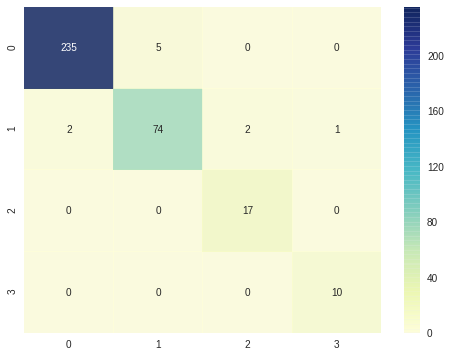

In [66]:
y_pred_class = model_4.predict_classes(X_test,verbose=0)
y_test_class = np.argmax(y_test,axis=1)
print(classification_report(y_test_class,y_pred_class))
plot_confusion_matrix(model_4, X_test, y_test_class)